<font color='LightBlue ' style="font-size:40px"><center><b>Problem set 1</b></center></font>

## <font color='Medium Violet ' style="font-size:25px"><b>Problem 1 - Risk aversion</b></font>


Consider an investor whose utility function is given by the expression:

$$u(W)=\frac{W^{1-\gamma}}{1-\gamma}$$

a) Define utility function $u(W)$ as a symbolic expression in Python which depends on two symbolic variables, $W$ and $\gamma$.

In [1]:
import sympy as sp

In [5]:
W,g = sp.symbols('W, gamma', real = True)

u = (W**(1-g))/(1-g)
u

W**(1 - gamma)/(1 - gamma)

b) Calculate the absolute coefficient of risk aversion of an investor who has such a utility function (A).

In [7]:
A = -(u.diff(W,2)/u.diff(W))
A

W**(1 - gamma)*W**(gamma - 1)*gamma/W

c) Suppose $\gamma = 0.6$. Compare **marginal utilities** of the investor if her wealth is 1000 and 1200. Comment whether your results make sense.

In [10]:
mu = u.diff(W)
print(f'Marginal utility at W=1000: {mu.subs({W:1000, g:0.6})} \nMarginal utility at W=1200 {mu.subs({W:1200,g:0.6})}')

Marginal utility at W=1000: 0.0158489319246111 
Marginal utility at W=1200 0.0142066359733971


<font color='crimson'>Put your comment here: </font>

Our investor's marginal utility at <font color='salmon'>W=1200</font> is less than their marginal utility at <font color='salmon'>W=1000</font>, meaning that their utility function is concave; that is, as their wealth increases, the amount of derived utility per additional unit of wealth decreases.

d) Suppose this investor can invest into a riskless and risky asset and that he finds an optimal portfolio. Suppose, now, that such an investor gets suddenly twice as wealthy. How should he change (or not) **the optimal amount of money** that he would invest into the risky portfolio? Answer this question **WITHOUT** performing portfolio optimization. Base your answer on the <u>Fundamental theorem</u> of portfolio optimization explained in class.

PS: Write an answer in passive (markdown/text) cell provided below.

<font color='crimson'>Put your answer here: </font>

In the case of our investor, their absolute coefficient of risk aversion decreases as their wealth grows, meaning that they become less risk averse; i.e the optimal amount of money (in absolute terms) they would put in the risky asses would increase.

e) If the investor gets twice as wealthy would he **change the optimal fraction of money** invested into the risky asset? If so, would he increase or decrease the fraction invested into the risky asset? Which indicator you need to callculate in order to answer this question <u>without performing a portfolio optimization</u>?

PS: Compute the indicator and make a comment based on it's value.

In [11]:
R = W*A
R

W**(1 - gamma)*W**(gamma - 1)*gamma

In [12]:
print(f'Relative coefficient of risk aversion at W=1000: {R.subs({W:1000,g:0.6}):0.4}\nRelative coefficient of risk aversion at W=2000: {R.subs({W:2000,g:0.6}):.4}')

Relative coefficient of risk aversion at W=1000: 0.6000
Relative coefficient of risk aversion at W=2000: 0.6000


<font color='crimson'>Put your comment here: </font>

As can be observed from the output above, the relative coefficient of risk aversion remains the same at both W=1000 and at double that, implying that no, our investor would not change the optimal fraction of money invested into the risky asset, regardless of their wealth.

## <font color='Violet ' style="font-size:25px"><b>Problem 2 - Portfolio optimization</b></font>

An investor has the utility function described in <font color='Violet '><b>Problem 1</b></font> with $\gamma=0.6$. Investor has initial wealth of $1000$ dollars. That amount of money can be invested either into a riskless asset which offers risk-free one period return of $r=3\%$, or  into a risky asset. Price of the risky asset can go up or down in the next period by $20\%$. Probability of an up move is $60$%. The initial price of risky asset is $50$ dollars while the initial price of the riskless asset is 1 dollar.

a) Find the optimal **amount of money** that should be invested into the risky asset. Bear in mind that the only difference between this problem and the example from the lecture notes is a different utility function.

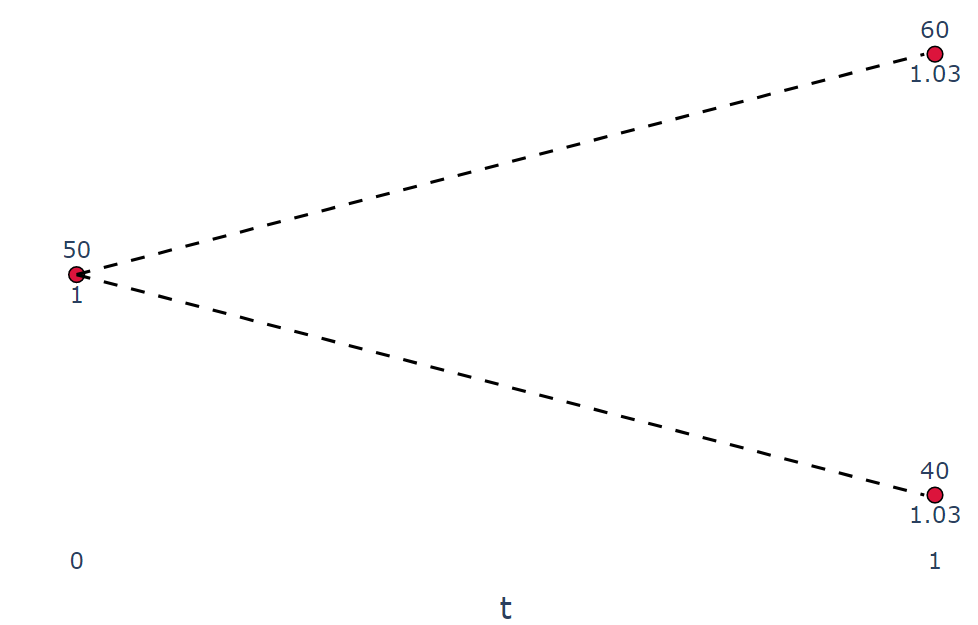

In [13]:
import numpy as np

In [14]:
#Initial Wealth of investor
W0=1000

#Return on risky asset
rs = np.array([60,40])/50-1

#Return on riskless asset
rf = 0.03

#Variable representating the fraction of wealth invested into the risky asset.
#We can get the fraction of wealth invested into the riskless asset with 1 - alpha
a = sp.Symbol('alpha', real=True)

#Two possible of future wealth, calculated via portfolio return( return through both the riskless and risky asset)
#Based off our investor initial wealth

W1=sp.Matrix(W0 * (1 + (1 - a)* rf + a* rs))
W1

Matrix([
[170.0*alpha + 1030.0],
[1030.0 - 230.0*alpha]])

In [17]:
#Our Investor's derived utility from each possible outcome
U=W1.applyfunc(lambda x: u.subs({W:x, g:0.6}))
U

Matrix([
[ 40.0935857181091*(0.16504854368932*alpha + 1)**0.4],
[40.0935857181091*(1 - 0.223300970873786*alpha)**0.4]])

In [18]:
#Probability vector for the risky asset
p = sp.Matrix([[0.6,0.4]])

#Expected utility; we multiply each outcome by their respective probabilities
EU = (p@U)[0]
EU

16.0374342872437*(1 - 0.223300970873786*alpha)**0.4 + 24.0561514308655*(0.16504854368932*alpha + 1)**0.4

In [21]:
a_opt = (sp.solve(EU.diff(a),a))[0]
print(f'Optimal fraction of wealth invested into risky asset: {a_opt:.4}\nOptimal fraction of wealth invested into riskless asset: {1-a_opt:.4}')

Optimal fraction of wealth invested into risky asset: 0.4361
Optimal fraction of wealth invested into riskless asset: 0.5639
